In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [247]:
# !wget https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv

In [248]:
df = pd.read_csv("auto-mpg.csv")
df = pd.read_csv("auto-mpg.csv", na_values=['?', '-'])

df.shape

(398, 9)

In [249]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [251]:
# horse power가 object, 중간에 문자가 섞여있음을 추정

In [252]:
df["horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [253]:
df = df.dropna()
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [254]:
df.shape

(392, 9)

In [255]:
df.columns = [x.replace(' ', '_') for x in  df.columns ]

In [256]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Train Test Split

In [257]:
X = df.drop(["mpg", "car_name", "model_year"], axis=1)
y = df["mpg"]

In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [259]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,origin
260,6,225.0,110.0,3620,18.7,1
184,4,140.0,92.0,2572,14.9,1
174,6,171.0,97.0,2984,14.5,1
64,8,318.0,150.0,4135,13.5,1
344,4,86.0,64.0,1875,16.4,1


In [260]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

## Preprocessing

- 결측치 삭제

In [261]:
"""X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_train.shape, y_train.shape"""

'X_train = X_train.dropna()\ny_train = y_train[X_train.index]\n\nX_train.shape, y_train.shape'

# Scaling

In [262]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

X_train_s

array([[ 0.30486156,  0.28457757,  0.14142863,  0.75480297,  1.1217589 ,
        -0.68982474],
       [-0.87318372, -0.53588042, -0.32949862, -0.49312922, -0.22893966,
        -0.68982474],
       [ 0.30486156, -0.23665456, -0.19868549, -0.00252992, -0.37111846,
        -0.68982474],
       ...,
       [-0.87318372, -0.4297035 , -0.51263699, -0.1561399 ,  0.73076722,
        -0.68982474],
       [-0.87318372, -0.94128319, -1.0358895 , -0.72175802,  1.83265289,
        -0.68982474],
       [ 1.48290683,  1.97375578,  1.18793363,  2.39450014, -0.54884195,
        -0.68982474]])

In [263]:
y_train = y_train.values

## Model

In [264]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=6, activation='relu', input_shape=(6,)),
    layers.Dense(units=3, activation='relu',),
    layers.Dense(units=1)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 6)                 42        
                                                                 
 dense_25 (Dense)            (None, 3)                 21        
                                                                 
 dense_26 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Model Compile
  * 손실 함수를 결정
  * Optimizer(어떤 경사하강법을 사용할지)
  * 매트릭스 (MAE, MSE...)

In [265]:
model.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mse", "mae"]
)

In [266]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(
    X_train_s, y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    verbose=1
)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 562.1517 - mse: 562.1517 - mae: 22.0473
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 549.4181 - mse: 549.4181 - mae: 21.7322
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 534.9565 - mse: 534.9565 - mae: 21.3747
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 518.4992 - mse: 518.4992 - mae: 20.9648
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 499.6147 - mse: 499.6147 - mae: 20.4928
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 477.3534 - mse: 477.3534 - mae: 19.9233
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 451.6620 - mse: 451.6620 - mae: 19.2642
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 422.9732 - mse: 422.9732 - mae: 18.5130
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 391.5292 - mse: 391.529

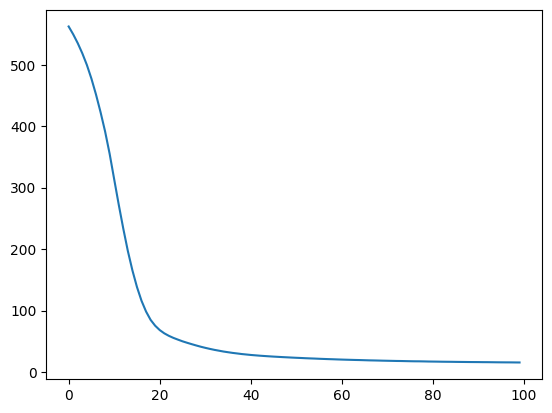

In [267]:
hist = history.history
epoch = history.epoch
plt.plot(epoch, hist["loss"])
plt.show()

## Validation

In [268]:
X_test.shape, y_test.shape

((79, 6), (79,))

In [269]:
X_test_s = scaler.transform(X_test)

In [270]:
y_pred = model.predict(X_test_s)

3/3 [==============================] - 0s 7ms/step


In [271]:
from sklearn.metrics import mean_squared_error
# Linear Regression

mean_squared_error(y_test, y_pred)

16.555002890292677

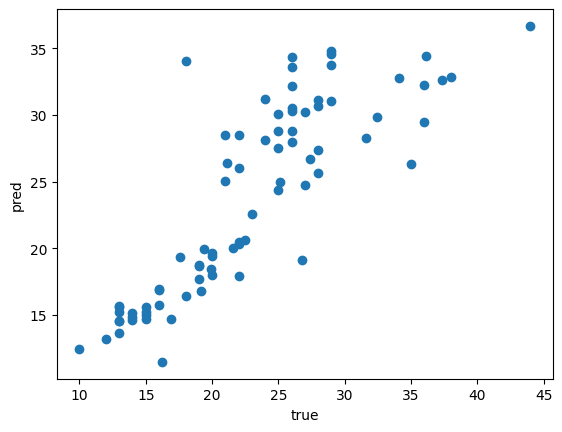

In [272]:
plt.scatter(y_test, y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()